In [1]:
import pandas as pd

names = ['Sex', 'Length', 'Diameter', 'Height', \
    'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
features = pd.read_csv('abalone/abalone.data', names=names)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

The equation is y = 2.3760534760988268 * x + 0.19249367399297282


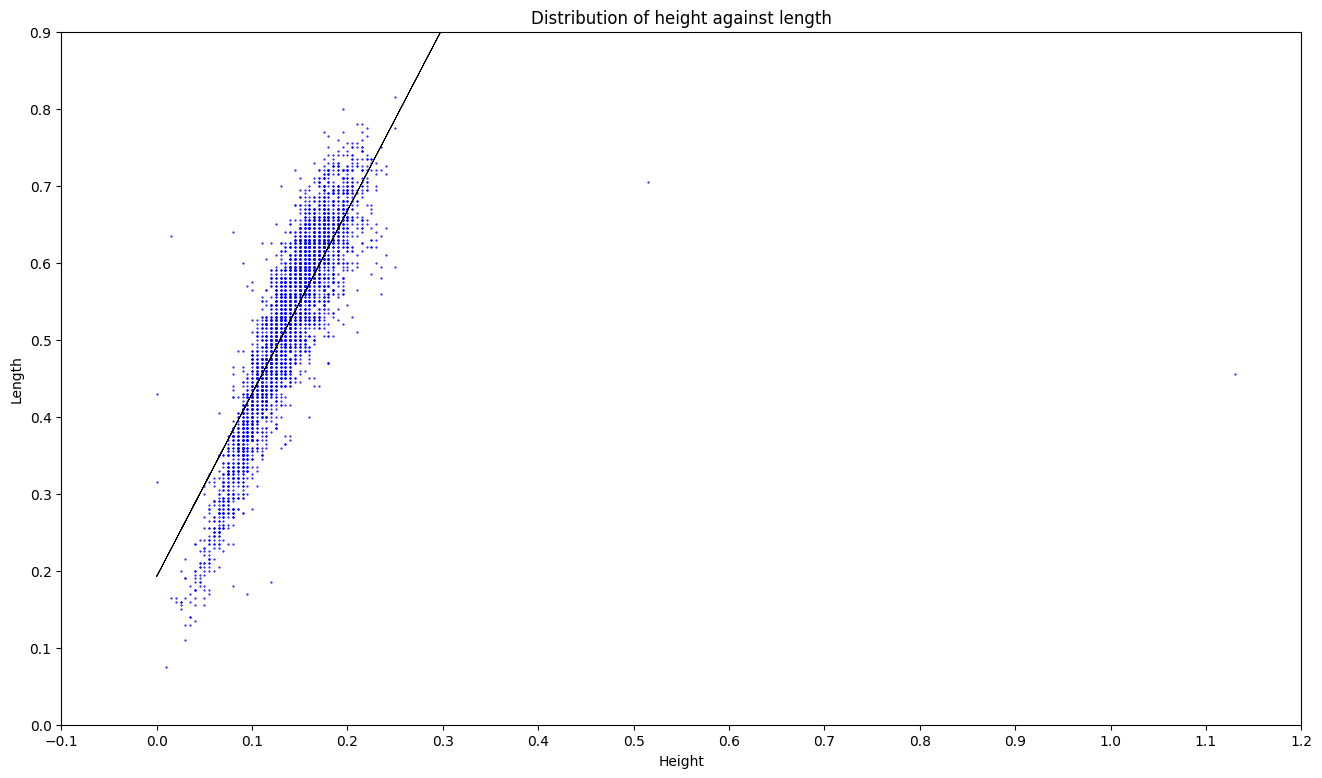

In [3]:
x = features.Height
y = features.Length

plt.figure(figsize=(16, 9))
plt.title("Distribution of height against length")
plt.xlabel("Height")
plt.ylabel("Length")
plt.xlim((-0.1, 1.2))
plt.ylim((0, 0.9))
x_ticks = np.arange(-0.1, 1.3, 0.1)
y_ticks = np.arange(0, 1.0, 0.1)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.scatter(x, y, color='blue', marker='.', s=1)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='black', linewidth=0.5)
print("The equation is y = {} * x + {}".format(m, b))

In [4]:
variables = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
pairs = []

for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var_1 = variables[i]
        var_2 = variables[j]
        correlation = features[var_1].corr(features[var_2])
        if correlation > 0.95:
            pairs.append((var_1, var_2, correlation))

print("These pairs of numeric variables have a correlation coefficient more than 0.95:")
for var_1, var_2, correlation in pairs:
    print("{} and {}, correlation {}".format(var_1, var_2, correlation))

These pairs of numeric variables have a correlation coefficient more than 0.95:
Length and Diameter, correlation 0.986811584602493
Whole_weight and Shucked_weight, correlation 0.9694054567034335
Whole_weight and Viscera_weight, correlation 0.9663750782730334
Whole_weight and Shell_weight, correlation 0.9553554421763281


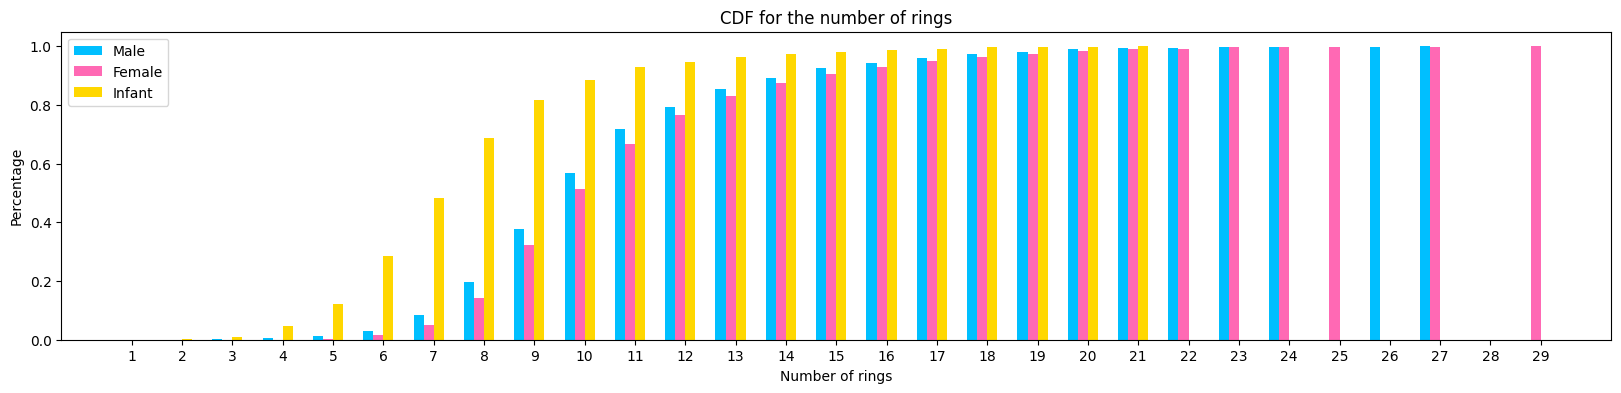

In [6]:
plt.figure(figsize=(20, 4))
plt.title("CDF for the number of rings")
plt.xlabel("Number of rings")
plt.ylabel("Percentage")
x_ticks = np.arange(1, 30, 1)
plt.xticks(x_ticks)

sexes = ['Male', 'Female', 'Infant']
offsets = [-0.3, -0.1, 0.1]
colours = ['deepskyblue', 'hotpink', 'gold']
for i in range(3):
    sex = sexes[i]
    offset = offsets[i]
    colour = colours[i]
    sex_repr = sex[0]
    sex_filtered = features.query('Sex == \'{}\''.format(sex_repr))
    rings_count = sex_filtered.groupby('Rings').size()
    rings_pdf = rings_count / rings_count.sum()
    rings_cdf = rings_pdf.cumsum()
    plt.bar(rings_cdf.index+offset, rings_cdf.values, width=0.2, label=sex, color=colour)
plt.legend()